# Setup

In [1]:
import os
if not 'notebookDir' in globals():
    notebookDir = os.getcwd()
print('notebookDir: ' + notebookDir)
os.chdir(notebookDir)

notebookDir: /home/user/Documents/Github/Uni/Master/TUM_Praktikum_NLP_Explainability/understanding-opinions-on-social-media/data exploration


# Data preparation

In [2]:
import pandas as pd
pd.options.display.max_columns = 100

In [3]:
dataset_path = '../data/USParties/Democrats.csv'
output = '../data/USParties/USParties_preprocessed.csv'

In [4]:
df = pd.read_csv(dataset_path, low_memory=False)
df_len = len(df)
df

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )
0,Senator Jack Reed,SenJackReed,213866375370646,GOVERNMENT_OFFICIAL,US,This is the official Facebook page of U.S. Sen...,2014-09-19 23:34:38 CEST,16439,30527,2021-05-05 17:32:19 CEST,2021-05-05,17:32:19,Photo,"3,757",1607,1231,195,491,2,161,7,50,13,NaN,-,0,0,0,NaN,https://www.facebook.com/213866375370646/posts...,"Welcome to Rhode Island, Madam Vice President!...",https://www.facebook.com/SenJackReed/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.53
1,U.S. Senator Kirsten Gillibrand,SenKirstenGillibrand,147791132432624,GOVERNMENT_OFFICIAL,US,The official Facebook page for the Office of S...,2017-06-14 22:20:54 CEST,28112,157368,2021-04-29 03:02:33 CEST,2021-04-29,03:02:33,Photo,"9,446",3808,2749,512,1982,13,234,25,79,44,NaN,-,0,0,0,NaN,https://www.facebook.com/147791132432624/posts...,"For the first time in history, both seats behi...",https://www.facebook.com/SenKirstenGillibrand/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82
2,Senator Maggie Hassan,SenatorHassan,523773000968844,GOVERNMENT_OFFICIAL,US,Proud to represent New Hampshire in the U.S. S...,2014-09-16 14:43:29 CEST,23081,37003,2021-04-23 18:13:17 CEST,2021-04-23,18:13:17,Photo,"5,755",1521,2907,138,587,9,190,18,373,12,NaN,-,0,0,0,NaN,https://www.facebook.com/523773000968844/posts...,Look who’s in New Hampshire today! I’m glad to...,https://www.facebook.com/SenatorHassan/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.15
3,Senator Jeanne Shaheen,SenatorShaheen,127503767282103,GOVERNMENT_OFFICIAL,US,U.S. Senator Jeanne Shaheen is proud to repres...,2013-04-09 00:43:14 CEST,30335,47703,2021-04-20 23:56:22 CEST,2021-04-20,23:56:22,Link,"2,223",1170,542,60,342,1,6,14,13,75,NaN,-,0,0,0,NaN,https://www.facebook.com/127503767282103/posts...,"Justice has been served, but George Floyd shou...",https://www.cnn.com/2021/04/20/us/derek-chauvi...,NaN,NaN,Derek Chauvin found guilty of all three charge...,The former Minneapolis Police officer who knel...,NaN,NaN,NaN,17.10
4,Alex Padilla,alexpadilla4ca,471134912978464,POLITICIAN,US,U.S. Senator for California. Husband & Dad. Fo...,2014-11-04 18:39:17 CET,28053,29355,2021-04-20 15:39:06 CEST,2021-04-20,15:39:06,Native Video,812,534,77,49,137,0,5,0,1,9,owned,Yes,3746,7257,0,00:02:04,https://www.facebook.com/471134912978464/posts...,"Today, I am excited to announce my reelection ...",https://www.facebook.com/alexpadilla4ca/videos...,NaN,NaN,Alex Padilla for Senate,NaN,NaN,NaN,NaN,16.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Senator Gary Peters,SenGaryPeters,88851604323,GOVERNMENT_OFFICIAL,US,U.S. Senator proudly representing the state of...,2013-04-09 00:40:45 CEST,42524,115082,2021-04-21 02:04:26 CEST,2021-04-21,02:04:26,Photo,"1,366",589,519,32,110,5,18,2,14,77,NaN,-,0,0,0,NaN,https://www.facebook.com/88851604323/posts/101...,Nothing can bring back George Floyd or take aw...,https://www.facebook.com/SenGaryPeters/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
929,Senator Chuck Schumer,senschumer,15771239406,GOVERNMENT_OFFICIAL,US,"Official Account of Senator Chuck Schumer, New...",2013-04-09 00:40:56 CEST,429062,584691,2021-04-20 22:12:29 CEST,2021-04-20,22:12:29,Photo,"3,551",2441,303,255,445,7,48,2,24,26,NaN,-,0,0,0,NaN,https://www.facebook.com/15771239406/posts/101...,"For decades, young men and women—disproportion...",https://www.facebook.com/senschumer/ph

In [5]:
"before:", df_len, "after:", len(df.drop_duplicates(subset=['Message', 'Image Text']))

('before:', 933, 'after:', 926)

In [6]:
df = df.assign(
        reactions_sum=df.apply(lambda r: r['Likes'] + r['Comments'] + r['Shares'] + r['Love'] + r['Wow'] + r['Haha'] + r['Sad'] + r['Angry'] + r['Care'], axis=1).values
)
df = df.assign(
        reactions_groupavg=df.groupby('Facebook Id')['reactions_sum'].transform('mean').values
)
df = df.assign(
        score=df.apply(lambda r: (r['reactions_sum'] / r['reactions_groupavg']), axis=1).values
)
df_prep = df
df_prep


,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,Post Created Date,Post Created Time,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Is Video Owner?,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),reactions_sum,reactions_groupavg,score
0,Senator Jack Reed,SenJackReed,213866375370646,GOVERNMENT_OFFICIAL,US,This is the official Facebook page of U.S. Sen...,2014-09-19 23:34:38 CEST,16439,30527,2021-05-05 17:32:19 CEST,2021-05-05,17:32:19,Photo,"3,757",1607,1231,195,491,2,161,7,50,13,NaN,-,0,0,0,NaN,https://www.facebook.com/213866375370646/posts...,"Welcome to Rhode Island, Madam Vice President!...",https://www.facebook.com/SenJackReed/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.53,3757,2015.500000,1.864054
1,U.S. Senator Kirsten Gillibrand,SenKirstenGillibrand,147791132432624,GOVERNMENT_OFFICIAL,US,The official Facebook page for the Office of S...,2017-06-14 22:20:54 CEST,28112,157368,2021-04-29 03:02:33 CEST,2021-04-29,03:02:33,Photo,"9,446",3808,2749,512,1982,13,234,25,79,44,NaN,-,0,0,0,NaN,https://www.facebook.com/147791132432624/posts...,"For the first time in history, both seats behi...",https://www.facebook.com/SenKirstenGillibrand/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.82,9446,959.370370,9.846041
2,Senator Maggie Hassan,SenatorHassan,523773000968844,GOVERNMENT_OFFICIAL,US,Proud to represent New Hampshire in the U.S. S...,2014-09-16 14:43:29 CEST,23081,37003,2021-04-23 18:13:17 CEST,2021-04-23,18:13:17,Photo,"5,755",1521,2907,138,587,9,190,18,373,12,NaN,-,0,0,0,NaN,https://www.facebook.com/523773000968844/posts...,Look who’s in New Hampshire today! I’m glad to...,https://www.facebook.com/SenatorHassan/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.15,5755,757.275862,7.599608
3,Senator Jeanne Shaheen,SenatorShaheen,127503767282103,GOVERNMENT_OFFICIAL,US,U.S. Senator Jeanne Shaheen is proud to repres...,2013-04-09 00:43:14 CEST,30335,47703,2021-04-20 23:56:22 CEST,2021-04-20,23:56:22,Link,"2,223",1170,542,60,342,1,6,14,13,75,NaN,-,0,0,0,NaN,https://www.facebook.com/127503767282103/posts...,"Justice has been served, but George Floyd shou...",https://www.cnn.com/2021/04/20/us/derek-chauvi...,NaN,NaN,Derek Chauvin found guilty of all three charge...,The former Minneapolis Police officer who knel...,NaN,NaN,NaN,17.10,2223,372.777778,5.963338
4,Alex Padilla,alexpadilla4ca,471134912978464,POLITICIAN,US,U.S. Senator for California. Husband & Dad. Fo...,2014-11-04 18:39:17 CET,28053,29355,2021-04-20 15:39:06 CEST,2021-04-20,15:39:06,Native Video,812,534,77,49,137,0,5,0,1,9,owned,Yes,3746,7257,0,00:02:04,https://www.facebook.com/471134912978464/posts...,"Today, I am excited to announce my reelection ...",https://www.facebook.com/alexpadilla4ca/videos...,NaN,NaN,Alex Padilla for Senate,NaN,NaN,NaN,NaN,16.24,812,506.565217,1.602953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Senator Gary Peters,SenGaryPeters,88851604323,GOVERNMENT_OFFICIAL,US,U.S. Senator proudly representing the state of...,2013-04-09 00:40:45 CEST,42524,115082,2021-04-21 02:04:26 CEST,2021-04-21,02:04:26,Photo,"1,366",589,519,32,110,5,18,2,14,77,NaN,-,0,0,0,NaN,https://www.facebook.com/88851604323/posts/101...,Nothing can bring back George Floyd or take aw...,https://www.facebook.com/SenGaryPeters/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1366,1666.842105,0.819514
929,Senator Chuck Schumer,senschumer,15771239406,GOVERNMENT_OFFICIAL,US,"Official Account of Senator Chuck Schumer, New...",2013-04-09 00:40:56 CEST,429062,584691,2021-04-20 22:12:29 CEST,2021-04-20,22:12:2

In [7]:
df_prep.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'reactions_sum', 'reactions_groupavg', 'score'],
      dtype='object')

In [8]:
unwanted_cols = ["Page Category", "Page Admin Top Country", "Page Description", "Page Created", "Post Created Date", "Post Created Time", "Is Video Owner?", "Sponsor Category"]

df_filt = df_prep.drop(unwanted_cols, axis=1)
# rename page and group name to name to be consistent
df_filt = df_filt.rename(columns={"Post Created": "Created", "Group Name": "Name", "Page Name": "Name"})
df_filt


,Name,User Name,Facebook Id,Likes at Posting,Followers at Posting,Created,Type,Total Interactions,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,Video Share Status,Post Views,Total Views,Total Views For All Crossposts,Video Length,URL,Message,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Overperforming Score (weighted — Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x ),reactions_sum,reactions_groupavg,score
0,Senator Jack Reed,SenJackReed,213866375370646,16439,30527,2021-05-05 17:32:19 CEST,Photo,"3,757",1607,1231,195,491,2,161,7,50,13,NaN,0,0,0,NaN,https://www.facebook.com/213866375370646/posts...,"Welcome to Rhode Island, Madam Vice President!...",https://www.facebook.com/SenJackReed/photos/a....,NaN,NaN,NaN,NaN,NaN,NaN,20.53,3757,2015.500000,1.864054
1,U.S. Senator Kirsten Gillibrand,SenKirstenGillibrand,147791132432624,28112,157368,2021-04-29 03:02:33 CEST,Photo,"9,446",3808,2749,512,1982,13,234,25,79,44,NaN,0,0,0,NaN,https://www.facebook.com/147791132432624/posts...,"For the first time in history, both seats behi...",https://www.facebook.com/SenKirstenGillibrand/...,NaN,NaN,NaN,NaN,NaN,NaN,18.82,9446,959.370370,9.846041
2,Senator Maggie Hassan,SenatorHassan,523773000968844,23081,37003,2021-04-23 18:13:17 CEST,Photo,"5,755",1521,2907,138,587,9,190,18,373,12,NaN,0,0,0,NaN,https://www.facebook.com/523773000968844/posts...,Look who’s in New Hampshire today! I’m glad to...,https://www.facebook.com/SenatorHassan/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,18.15,5755,757.275862,7.599608
3,Senator Jeanne Shaheen,SenatorShaheen,127503767282103,30335,47703,2021-04-20 23:56:22 CEST,Link,"2,223",1170,542,60,342,1,6,14,13,75,NaN,0,0,0,NaN,https://www.facebook.com/127503767282103/posts...,"Justice has been served, but George Floyd shou...",https://www.cnn.com/2021/04/20/us/derek-chauvi...,NaN,NaN,Derek Chauvin found guilty of all three charge...,The former Minneapolis Police officer who knel...,NaN,NaN,17.10,2223,372.777778,5.963338
4,Alex Padilla,alexpadilla4ca,471134912978464,28053,29355,2021-04-20 15:39:06 CEST,Native Video,812,534,77,49,137,0,5,0,1,9,owned,3746,7257,0,00:02:04,https://www.facebook.com/471134912978464/posts...,"Today, I am excited to announce my reelection ...",https://www.facebook.com/alexpadilla4ca/videos...,NaN,NaN,Alex Padilla for Senate,NaN,NaN,NaN,16.24,812,506.565217,1.602953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Senator Gary Peters,SenGaryPeters,88851604323,42524,115082,2021-04-21 02:04:26 CEST,Photo,"1,366",589,519,32,110,5,18,2,14,77,NaN,0,0,0,NaN,https://www.facebook.com/88851604323/posts/101...,Nothing can bring back George Floyd or take aw...,https://www.facebook.com/SenGaryPeters/photos/...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1366,1666.842105,0.819514
929,Senator Chuck Schumer,senschumer,15771239406,429062,584691,2021-04-20 22:12:29 CEST,Photo,"3,551",2441,303,255,445,7,48,2,24,26,NaN,0,0,0,NaN,https://www.facebook.com/15771239406/posts/101...,"For decades, young men and women—disproportion...",https://www.facebook.com/senschumer/photos/a.1...,NaN,NORML NORML @NORML Schumer says it's time to e...,NaN,NaN,NaN,NaN,1.00,3551,5172.552239,0.686508
930,Alexandria Ocasio-Cortez,OcasioCortez,1316372698453411,1775646,1870212,2021-04-17 15:59:38 CEST,Link,"32,987",22242,3702,1321,4636,63,251,31,318,423,NaN,0,0,0,NaN,https://www.facebook.com/1316372698453411/post...,This is a testament to the power that people’s...,https://apnews.com/article/joe-biden-donald-tr...,NaN,NaN,"After outcry, WH says Biden will lift refugee ...",WASHINGTON (AP) — Facing swift blowback from a...,NaN,NaN,1.00,32987,50609.250000,0.651798
931,U.S. Senator Kirsten Gillibrand,SenKirstenGillibrand,147791132432624,28084,157368,2021-04-20 18:13:20 CEST,Native Video,251,146,28,44,8,0,1,1,3,20,owned,3054,3632,0,00:01:42,https://www.facebook.com/147791132432624/posts...,It is a moral outrage tha

In [9]:
df_filt.to_csv(output)

# Training

In [1]:
import pytorch_lightning as pl
from nlp_utils.data_module import CrowdTangleDataModule, PlainCrowdTangleDataModule
from nlp_utils.model import BaseModel, BiLSTMModel
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
%load_ext tensorboard

In [2]:
# Start tensorboard
! pkill tensorboard
! rm -r /tmp/.tensorboard-info
%tensorboard --logdir lightning_logs --bind_all

Launching TensorBoard...

In [3]:
# config from notebooks
config = {
    'batch_size': 128,
    'dataset_path': '../../data/USParties/USParties_preprocessed.csv',
    'category_group_id': False, # impacts size of data_module.class_encoder.categories_
    'learning_rate': 1e-4
}

In [4]:
# config used by Simon
config = {
    'batch_size': 32,
    'dataset_path': '../../data/USParties/USParties_preprocessed.csv',
    'learning_rate': 0.01
}

## read dataset + labels

In [5]:
#data_module = CrowdTangleDataModule(config=config)
data_module = PlainCrowdTangleDataModule(config=config)
data_module.setup('')
# tokenizer for decoding sentences
tokenizer = data_module.get_tokenizer() 

In [6]:
category_vector_length = len(data_module.class_encoder.get_feature_names())
config['category_encoded_length'] = category_vector_length
config['category_encoder_out'] = category_vector_length
config['vocab_size'] = len(data_module.vocab)

In [7]:
#model = BaseModel(config)
model = BiLSTMModel(config)
trainer = pl.Trainer(gpus=0,
                     log_every_n_steps=1,
                     flush_logs_every_n_steps=1,
                    callbacks=[EarlyStopping(monitor='val_loss')], max_epochs=2) #, max_epochs=10, overfit_batches=10)
trainer.fit(model, data_module)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name             | Type             | Params
------------------------------------------------------
0 | train_metric     | MeanSquaredError | 0     
1 | val_metric       | MeanSquaredError | 0     
2 | embedding        | Embedding        | 61.6 K
3 | category_encoder | Sequential       | 28.7 K
4 | bilstm           | LSTM             | 302 K 
5 | classifier       | Linear           | 470   
------------------------------------------------------
393 K     Trainable params
0         Non-trainable params
393 K     Total params
1.573     Total estimated model params size (MB)
Epoch 0:  75%|███████▌  | 18/24 [00:12<00:04,  1.48it/s, loss=1.14, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 1:  75%|███████▌  | 18/24 [00:13<00:04,  1.30it/s, loss=0.572, v_num=1]
Validating: 0it [00:00, ?it/s]
Epoch 1: 100%|██████████| 24/24 [00:15<00:00,  1.58it/s, loss=0.572, v_num=1]


In [8]:
y_lst, encoded_texts_lst, category_vectors_lst, features = next(iter(data_module.train_dataloader()))

In [9]:
# only works if category group id = True
len(data_module.class_encoder.categories_[2])

116

# Evaluation

In [1]:
import pandas as pd
from nlp_utils.data_module import PlainCrowdTangleDataModule, CrowdTangleDataModule, GroupId2Name, inverse_transform
from nlp_utils.model import BaseModel, BiLSTMModel
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from glob import glob
import ipywidgets as widgets
from tqdm.notebook import tqdm
import pandas as pd
import torch
import seaborn as sb
import re
%load_ext tensorboard

In [2]:
# Start tensorboard
! pkill tensorboard
! rm -r /tmp/.tensorboard-info
%tensorboard --logdir lightning_logs --bind_all

Launching TensorBoard...

Select a model

In [32]:
w = widgets.Dropdown(
    options=glob('lightning_logs/*/checkpoints/*.ckpt'),
    description='Select a checkpoint:'
)
w

Dropdown(description='Select a checkpoint:', options=('lightning_logs/version_0/checkpoints/epoch=1-step=35.ck…

In [33]:
model_version = re.findall("version_[0-9]+", w.value)[0]
#model = BaseModel.load_from_checkpoint(w.value)
model = BiLSTMModel.load_from_checkpoint(w.value)

torch.no_grad()
model.eval()
#data_module = CrowdTangleDataModule(config=model.config)
data_module = PlainCrowdTangleDataModule(config=model.config) # for BiLSTM
data_module.setup('')
model.config, model_version

({'column_goldlabel': 'score',
  'dataset_path': '../../data/USParties/USParties_preprocessed.csv',
  'category_group_id': True,
  'category_type': True,
  'category_tld': True,
  'batch_size': 32,
  'category_encoded_length': 169,
  'category_encoder_out': 169,
  'learning_rate': 0.01,
  'vocab_min_freq': 10,
  'bilstm_hidden_dim': 150,
  'embedding_dim': 100,
  'vocab_size': 616},
 'version_1')

### Validation Set Results

In [34]:
df_dicts = []
val_loader = data_module.val_dataloader()
#groupid2name = GroupId2Name(model.config)
for y_lst, encoded_texts_lst, category_vectors_lst, features in tqdm(iter(val_loader),total=len(val_loader)):
    
    result = model(encoded_texts_lst, category_vectors_lst)
    
    if type(data_module) == type(PlainCrowdTangleDataModule()):
        enc_text_lst = encoded_texts_lst
    else:
        enc_text_lst = encoded_texts_lst['input_ids']

    for y_hat, y, encoded_text, category_vector in zip(result, y_lst, enc_text_lst, category_vectors_lst):
        decoded_categories = inverse_transform(category_vector.reshape(1, -1), model.config, data_module.class_encoder)
        if type(data_module) == type(PlainCrowdTangleDataModule()):
            df_dicts.append({**{
                'prediction': float(y_hat),
                'gold label': float(y),
                'text': ' '.join([data_module.vocab.itos[int(t)] for t in encoded_text])
            },**decoded_categories})
        else:
            df_dicts.append({**{
                'prediction': float(y_hat),
                'gold label': float(y),
                'text': data_module.tokenizer.decode(encoded_text).replace(' [PAD]','')
            },**decoded_categories})
#encoded_texts
#data_module.tokenizer.decode(encoded_texts["input_ids"][0]).replace(' [PAD]','')
df = pd.DataFrame.from_dict(df_dicts)
df

  0%|          | 0/6 [00:00<?, ?it/s]

,prediction,gold label,text,group_id,post_type,domain
0,1.084828,0.677367,there ' s no <unk> <unk> ' s infrastructure is...,2.614783e+14,Link,None
1,1.222743,0.527254,i ' m <unk> <unk> by <unk> <unk> ' s <unk> to ...,6.846731e+09,Photo,facebook
2,1.093333,0.698824,a <unk> day for all those <unk> by the <unk> <...,4.711349e+14,Link,go
3,1.284127,0.588431,great to be with first <unk> <unk> . <unk> bid...,7.667947e+14,Photo,facebook
4,1.158600,1.739470,we have lost too many <unk> already to the mis...,2.105730e+11,Status,
...,...,...,...,...,...,...
182,1.132941,1.619407,"yesterday , president joe biden made history ....",1.093040e+11,Link,cnbc
183,0.983703,0.613468,"<unk> <unk> if i was <unk> <unk> , i would hav...",6.565240e+14,Native Video,facebook
184,1.179160,0.474683,<unk> like a plan that <unk> in their families...,7.437493e+10,Link,thehill
185,1.375174,0.951422,<unk> i’m <unk> the <unk> of congress or at th...,1.283446e+15,Photo,facebook


Text(0.5, 1.0, 'version_0')

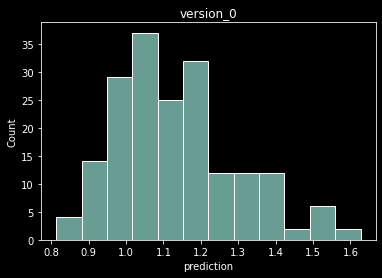

In [13]:
sb.histplot(data=df['prediction']).set_title(model_version)

### Manual Test

In [1]:
import tldextract
import pandas as pd
import ipywidgets as widgets
import torch
from nlp_utils.data_module import PlainCrowdTangleDataModule, CrowdTangleDataModule, GroupId2Name, inverse_transform
from nlp_utils.model import BaseModel, BiLSTMModel
from glob import glob
import re
import pytorch_lightning as pl
from tqdm.notebook import tqdm

tld_extractor = tldextract.TLDExtract()

In [2]:
w = widgets.Dropdown(
    options=glob('lightning_logs/*/checkpoints/*.ckpt'),
    description='Select a checkpoint:'
)
w

Dropdown(description='Select a checkpoint:', options=('lightning_logs/version_0/checkpoints/epoch=1-step=35.ck…

In [3]:
model_version = re.findall("version_[0-9]+", w.value)[0]
#model = BaseModel.load_from_checkpoint(w.value)
model = BiLSTMModel.load_from_checkpoint(w.value)

torch.no_grad()
model.eval()
#data_module = CrowdTangleDataModule(config=model.config)
data_module = PlainCrowdTangleDataModule(config=model.config) # for BiLSTM
data_module.setup('')
model.config, model_version

({'column_goldlabel': 'score',
  'dataset_path': '../../data/USParties/USParties_preprocessed.csv',
  'category_group_id': True,
  'category_type': True,
  'category_tld': True,
  'batch_size': 32,
  'category_encoded_length': 169,
  'category_encoder_out': 169,
  'learning_rate': 0.01,
  'vocab_min_freq': 10,
  'bilstm_hidden_dim': 150,
  'embedding_dim': 100,
  'vocab_size': 616},
 'version_1')

In [4]:
dataset_path = '../data/USParties/USParties_preprocessed.csv'

In [5]:
df = pd.read_csv(dataset_path)
w_post_type = widgets.Dropdown(
    options=df['Type'].unique().tolist(),
    description='Post Type:'
)
w_group_id = widgets.Dropdown(
    options=list(df.drop_duplicates(subset=['Name', 'Facebook Id'])[['Name', 'Facebook Id']].itertuples(index=False, name=None)),
    description='Group/Page:'
)
w_category_tld = widgets.Textarea(
    value="",
    placeholder="post domain"
)
w_text = widgets.Textarea(
    value='',
    placeholder='post text'
)
display(w_post_type, w_group_id, w_category_tld, w_text)

Dropdown(description='Post Type:', options=('Photo', 'Link', 'Native Video', 'Status', 'Video', 'Live Video Co…

Dropdown(description='Group/Page:', options=(('Senator Jack Reed', 213866375370646), ('U.S. Senator Kirsten Gi…

Textarea(value='', placeholder='post domain')

Textarea(value='', placeholder='post text')

In [6]:
x = df[df["Facebook Id"]==w_group_id.value].head(1).drop(["Unnamed: 0"], axis=1)
print("Type: ", x["Type"][0])
print("Name: ", x["Name"][0])
if not pd.isna(x["Link"][0]):
    domain = tld_extractor(x["Link"][0]).domain
print("Domain: ", domain)
print("Text: ", x["Message"][0])

Type:  Photo
Name:  Senator Jack Reed
Domain:  facebook
Text:  Welcome to Rhode Island, Madam Vice President! We are thrilled to have @VicePresident in the Ocean State today and hope this will be the first of many visits.


In [ ]:
from torch.utils.data import DataLoader

In [24]:
tset = CrowdTangleDataset(w_text.value, 0.677367)
tload = DataLoader(tset, batch_size=1, collate_fn=data_module.collator.collate, num_workers=data_module.num_workers)
"""
for y_lst, encoded_texts_lst, category_vectors_lst, _ in tqdm(iter(tload), total=len(tload))
    y_hat_lst = model(encoded_texts_lst, category_vectors_lst)
    totalmse(y_hat_lst.squeeze(), y_lst)
"""

NameError: name 'CrowdTangleDataset' is not defined

In [7]:
class_encoding = torch.FloatTensor(data_module.class_encoder.transform([(w_group_id.value, w_post_type.value, w_category_tld)]))
if type(data_module) == type(PlainCrowdTangleDataModule()):
    text_encoding = torch.tensor([data_module.vocab[token] for token in data_module.tokenizer(w_text.value)])
else:
    text_encoding = data_module.tokenizer([w_text.value], padding=True, truncation=True, return_tensors="pt")

result = model(text_encoding, class_encoding) # TODO: doesn't work for BiLSTM
float(result)

TypeError: _basic_english_normalize() got an unexpected keyword argument 'padding'

### MSE per group

In [18]:
# initialize MSE for each facebook group
groupid2name = GroupId2Name(model.config)
df_dicts = []
groups_mse = {}
totalmse = pl.metrics.MeanSquaredError()
for group_id, _ in groupid2name.group_id2name.items():
    groups_mse[group_id] = pl.metrics.MeanSquaredError()
    
for y_lst, encoded_texts_lst, category_vectors_lst, _ in tqdm(iter(data_module.test_dataloader()), total=len(data_module.test_dataloader())):
    y_hat_lst = model(encoded_texts_lst, category_vectors_lst)
    totalmse(y_hat_lst.squeeze(), y_lst)
    
    if type(data_module) == type(PlainCrowdTangleDataModule()):
        enc_text_lst = encoded_texts_lst
    else:
        enc_text_lst = encoded_texts_lst['input_ids']

    for y_hat, y, encoded_text, category_vector in zip(y_hat_lst, y_lst, enc_text_lst, category_vectors_lst):
        decoded_categories = inverse_transform(category_vector.reshape(1, -1), model.config, data_module.class_encoder)
        group_id = decoded_categories['group_id']
        
        groups_mse[group_id](y_hat.squeeze(), y)
    
        if type(data_module) == type(PlainCrowdTangleDataModule()):
            df_dicts.append({**{
                'prediction': float(y_hat),
                'gold label': float(y),
                'text': ' '.join([data_module.vocab.itos[int(t)] for t in encoded_text])
            },**decoded_categories})
        else:
            df_dicts.append({**{
                'prediction': float(y_hat),
                'gold label': float(y),
                'text': data_module.tokenizer.decode(encoded_text).replace(' [PAD]','')
            },**decoded_categories})
for group_id, _ in groups_mse.items():
    print(groupid2name(group_id) + ':', float(groups_mse[group_id].compute()))


  0%|          | 0/6 [00:00<?, ?it/s]

Senator Jack Reed: nan
U.S. Senator Kirsten Gillibrand: 0.47789883613586426
Senator Maggie Hassan: 3.2024075984954834
Senator Jeanne Shaheen: 0.20175902545452118
Alex Padilla: 0.7485918402671814
Senator Edward J. Markey: 1.4073678255081177
Senator Bob Menendez: 0.9210154414176941
Senator Chuck Schumer: 0.5593762993812561
Senator Kyrsten Sinema: 0.5791011452674866
Senator Debbie Stabenow: 0.0008375904290005565
Senator Tom Carper: 0.6693183779716492
U.S. Senator Tina Smith: 0.25620588660240173
Senator Patrick Leahy: 1.0871810913085938
Jon Ossoff: nan
Senator Catherine Cortez Masto: 0.05008186399936676
Senator Joe Manchin III: 0.10560048371553421
U.S. Senator Bernie Sanders: 0.614376425743103
Sen. Jacky Rosen: 0.17147427797317505
Senator John Hickenlooper: 0.4572044312953949
Senator Tammy Duckworth: 0.4938589334487915
Senator Angus S. King, Jr.: 1.046777606010437
Senator Mark Kelly: 0.0015922244638204575
Senator Van Hollen: 3.9522199630737305
Senator Chris Murphy: 0.5683474540710449
Senat

In [19]:
totalmse.compute()

tensor(0.7060)

In [20]:
pd.DataFrame.from_dict(df_dicts)

,prediction,gold label,text,group_id,post_type,domain
0,1.240677,0.941636,no one should work <unk> and still live in <un...,471134912978464,Status,
1,1.127430,0.365785,<unk> million <unk> checks — that’s more famil...,523773000968844,Link,bloomberg
2,1.077624,1.092434,these executive <unk> are important but <unk> ...,74374931545,Link,nbcnews
3,1.000997,1.494046,<unk> <unk> have long <unk> <unk> of <unk> <un...,6846731378,Link,washingtonpost
4,1.240677,0.890310,i did not come to washington to be <unk> in <u...,471134912978464,Status,
...,...,...,...,...,...,...
182,0.959228,0.722378,i’ve long said we need to invest in public hea...,131182018871,Link,None
183,1.232681,0.799981,<unk> <unk> <unk> of <unk> want action to impr...,74374931545,Link,politico
184,1.200279,1.038529,what a <unk> a year <unk> . <unk> it ' s been ...,7935122852,Link,politico
185,1.058223,0.790326,"with this <unk> , president biden has <unk> ou...",180436795325335,Link,washingtonpost


### MSE without groups

In [21]:
df_dicts = []
mse = pl.metrics.MeanSquaredError()
for y_lst, encoded_texts_lst, category_vectors_lst, _ in tqdm(iter(data_module.test_dataloader()), total=len(data_module.test_dataloader())):
    y_hat_lst = model(encoded_texts_lst, category_vectors_lst)
    mse(y_hat_lst.squeeze(), y_lst)

    if type(data_module) == type(PlainCrowdTangleDataModule()):
        enc_text_lst = encoded_texts_lst
    else:
        enc_text_lst = encoded_texts_lst['input_ids']
    
    for y_hat, y, encoded_text, category_vector in zip(y_hat_lst, y_lst, enc_text_lst, category_vectors_lst):
        decoded_categories = inverse_transform(category_vector.reshape(1, -1), model.config, data_module.class_encoder)
           
        if type(data_module) == type(PlainCrowdTangleDataModule()):
            df_dicts.append({**{
                'prediction': float(y_hat),
                'gold label': float(y),
                'text': ' '.join([data_module.vocab.itos[int(t)] for t in encoded_text])
            },**decoded_categories})
        else:
            df_dicts.append({**{
                'prediction': float(y_hat),
                'gold label': float(y),
                'text': data_module.tokenizer.decode(encoded_text).replace(' [PAD]','')
            },**decoded_categories})


  0%|          | 0/6 [00:00<?, ?it/s]

In [22]:
mse.compute()

tensor(0.7060)

# Analysis

In [1]:
import pandas as pd
import seaborn as sb
from pathlib import Path
sb.set_context(rc = {'patch.linewidth': 0.0})

In [2]:
dataset_path = Path('../data/USParties/USParties_preprocessed.csv')

In [3]:
df = pd.read_csv(dataset_path,low_memory=False)
dataset_name = dataset_path.stem
figure_path = Path('./figures/' + dataset_name + '/')
figure_path.mkdir(parents=True, exist_ok=True)
dataset_name, str(figure_path)

('USParties_preprocessed', 'figures/USParties_preprocessed')

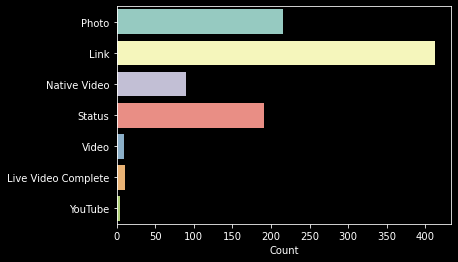

In [7]:
#df['Type'].value_counts().plot(kind='bar')
plt = sb.countplot(y="Type", data=df)
plt.set(ylabel="", xlabel="Count")
plt.figure.savefig(f'{figure_path}/post_types_dist.pdf', bbox_inches = 'tight', pad_inches = 0)

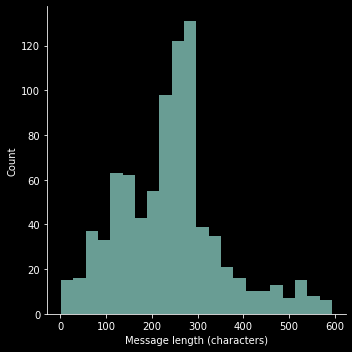

In [8]:
plt = sb.displot(df[df['Message'].str.len() < 600]['Message'].str.len())
plt.set(xlabel="Message length (characters)")
plt.savefig(f'{figure_path}/message_length_dist.pdf', bbox_inches = 'tight', pad_inches = 0)

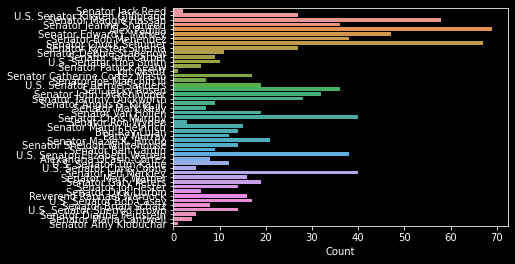

In [4]:
plt = sb.countplot(y="Name", data=df)
plt.set(xlabel="Count", ylabel="")
plt.figure.savefig(f'{figure_path}/group_dist.pdf', bbox_inches = 'tight', pad_inches = 0)

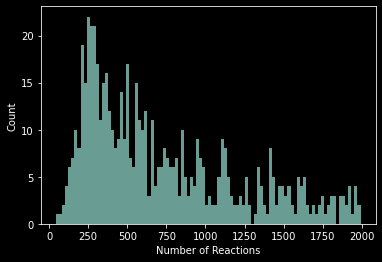

In [10]:
df_score_filtered = df[(df.reactions_sum < 2000)]
plt = sb.histplot(data=df_score_filtered['reactions_sum'], bins=100)
plt.set(xlabel="Number of Reactions")
plt.figure.savefig(f'{figure_path}/reactions_dist.pdf', bbox_inches = 'tight', pad_inches = 0)

In [11]:
df.reactions_sum.median()

1098.0